# Data Processing

### Import libs

In [208]:
import pandas as pd
import pyIpeaData as ip
import matplotlib.pyplot as plt
import numpy

### Carregando CSV votacao_partido_munzona_2022_BR

In [209]:
df_eleicoes_22 = pd.read_csv("raw/votacao_partido_munzona_2022_BR.csv",sep=";",decimal=",",encoding="Latin 1")

### Agrupando total de votos

In [210]:
df_eleicoes_22["QTD_VOTOS_VALIDOS"] = (
    df_eleicoes_22["QT_VOTOS_LEGENDA_VALIDOS"] +
    df_eleicoes_22["QT_VOTOS_NOM_CONVR_LEG_VALIDOS"] +
    df_eleicoes_22["QT_TOTAL_VOTOS_LEG_VALIDOS"] +
    df_eleicoes_22["QT_VOTOS_NOMINAIS_VALIDOS"]
)

### Removendo colunas desnecessarias

In [211]:
colunas_para_remover = [
    "ST_VOTO_EM_TRANSITO",
    "QT_VOTOS_LEGENDA_ANUL_SUBJUD",
    "QT_VOTOS_NOMINAIS_ANUL_SUBJUD",
    "QT_VOTOS_LEGENDA_ANULADOS",
    "QT_VOTOS_NOMINAIS_ANULADOS",
    "DT_GERACAO", 
    "HH_GERACAO",  
    "CD_TIPO_ELEICAO",
    "NM_TIPO_ELEICAO", 
    "NR_TURNO", 
    "CD_ELEICAO", 
    "DS_ELEICAO", 
    "DT_ELEICAO",
    "TP_ABRANGENCIA",  
    "SG_UE", 
    "NM_UE",
    "CD_CARGO",
    "CD_MUNICIPIO",    
    "NR_ZONA",  
    "TP_AGREMIACAO",
    "NR_PARTIDO",  
    "NR_FEDERACAO",
    "NM_FEDERACAO",
    "SG_FEDERACAO", 
    "DS_COMPOSICAO_FEDERACAO",
    "SQ_COLIGACAO", 
    "NM_COLIGACAO", 
    "DS_COMPOSICAO_COLIGACAO",
    'QT_VOTOS_LEGENDA_VALIDOS',
    'QT_VOTOS_NOM_CONVR_LEG_VALIDOS',
    'QT_TOTAL_VOTOS_LEG_VALIDOS',
    'QT_VOTOS_NOMINAIS_VALIDOS'
]
df_eleicoes_novo = df_eleicoes_22.drop(columns=colunas_para_remover)


### Agrupando por estado e partido

In [212]:
df_resultados_agregados = df_eleicoes_novo.groupby(["SG_UF", "SG_PARTIDO"])["QTD_VOTOS_VALIDOS"].sum().reset_index()


#### Consulta por Estado

In [213]:
df_resultados = df_resultados_agregados[df_resultados_agregados['SG_UF'] == 'RJ']


/tmp/ipykernel_117856/3229511856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados['PORCENTAGEM'] = (df_resultados['QTD_VOTOS_VALIDOS'] / total_votos_geral) * 100


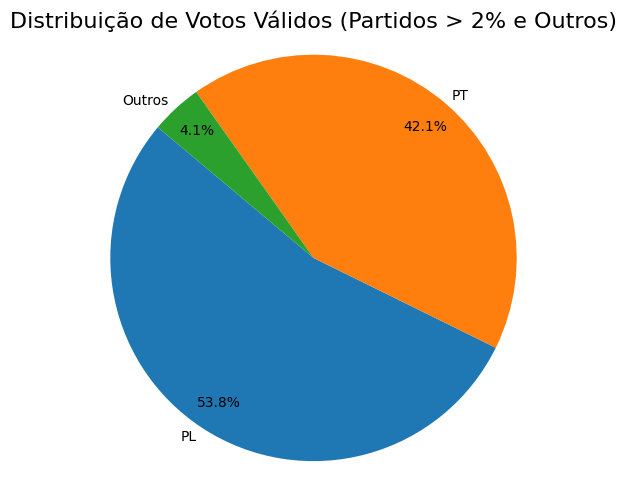

In [214]:
total_votos_geral = df_resultados['QTD_VOTOS_VALIDOS'].sum()
df_resultados['PORCENTAGEM'] = (df_resultados['QTD_VOTOS_VALIDOS'] / total_votos_geral) * 100

# --- PASSO 3: Identificar partidos com mais de 2% e agrupar os demais ---
threshold_percent = 2 # Limite de 2%

# Partidos que estão acima do limite
df_maiores_partidos = df_resultados[df_resultados['PORCENTAGEM'] > threshold_percent].copy()

# Somar os votos dos partidos que estão abaixo ou igual ao limite
votos_outros_partidos = df_resultados[df_resultados['PORCENTAGEM'] <= threshold_percent]['QTD_VOTOS_VALIDOS'].sum()

# Criar uma nova linha para a categoria "Outros"
df_outros = pd.DataFrame([{'SG_PARTIDO': 'Outros', 'QTD_VOTOS_VALIDOS': votos_outros_partidos}])

# Concatenar os maiores partidos com a categoria "Outros"
df_para_pizza = pd.concat([df_maiores_partidos[['SG_PARTIDO', 'QTD_VOTOS_VALIDOS']], df_outros], ignore_index=True)


# --- PASSO 4: Gerar o Gráfico de Pizza com os dados ajustados ---
plt.figure(figsize=(5, 5)) # Tamanho da figura

plt.pie(df_para_pizza['QTD_VOTOS_VALIDOS'],
        labels=df_para_pizza['SG_PARTIDO'],
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85, # Distância da porcentagem do centro
        labeldistance=1.05) # Distância do rótulo do centro

plt.title(f'Distribuição de Votos Válidos (Partidos > {threshold_percent}% e Outros)', fontsize=16)

plt.axis('equal') # Garante que o gráfico seja um círculo

# Para garantir que os rótulos não se sobreponham, especialmente em casos com muitas fatias pequenas
plt.tight_layout()
plt.show()

### Importando XLSX legenda_por_ideologia

In [215]:
df_ideologia = pd.read_excel("/home/fbotero/Documents/POS/raw/legenda_por_ideologia.xlsx")

In [216]:
df_ideologia

,Sigla do Partido,Nome Completo do Partido,Classificação Ideológica Consolidada,Notas sobre a Classificação
0,PL,Partido Liberal,Direita,Consenso baseado em múltiplas fontes recentes ...
1,PT,Partido dos Trabalhadores,Esquerda,Consenso baseado em múltiplas fontes recentes
2,MDB,Movimento Democrático Brasileiro,Centro,"Consenso majoritário, apesar de classificações..."
3,PSDB,Partido da Social Democracia Brasileira,Centro,"Consenso majoritário, com algumas fontes indic..."
4,PSB,Partido Socialista Brasileiro,Centro-Esquerda,Consenso baseado em múltiplas fontes
5,PP,Progressistas,Direita,Consenso baseado em múltiplas fontes
6,PSD,Partido Social Democrático,Centro,"Consenso majoritário, com algumas fontes indic..."
7,PSOL,Partido Socialismo e Liberdade,Esquerda,Consenso baseado em múltiplas fontes
8,NOVO,Partido Novo,Direita,Consenso baseado em múltiplas fontes
9,PDT,Partido Democrático Trabalhista,Centro-Esquerda,Consenso baseado em múltiplas fontes


In [217]:
df_total_votos_rs_por_partido = pd.DataFrame(df_resultados)

df_combinado = pd.merge(df_total_votos_rs_por_partido,
                        df_ideologia[['Sigla do Partido', 'Classificação Ideológica Consolidada']],
                        left_on='SG_PARTIDO',
                        right_on='Sigla do Partido',
                        how='left') 

df_combinado = df_combinado.drop(columns=['Sigla do Partido'])


df_combinado

,SG_UF,SG_PARTIDO,QTD_VOTOS_VALIDOS,PORCENTAGEM,Classificação Ideológica Consolidada
0,RJ,DC,1546,0.008130,Direita
1,RJ,MDB,365969,1.924452,Centro
2,RJ,NOVO,43091,0.226595,Direita
3,RJ,PCB,4458,0.023442,Extrema-Esquerda
4,RJ,PDT,301489,1.585383,Centro-Esquerda
5,RJ,PL,10235140,53.821602,Direita
6,RJ,PSTU,2643,0.013898,Extrema-Esquerda
7,RJ,PT,8003360,42.085761,Esquerda
8,RJ,PTB,7760,0.040806,Centro-Esquerda
9,RJ,UNIÃO,44252,0.232700,Centro-Direita
